In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from fbprophet import Prophet
import seaborn as sns
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [24]:
df = pd.read_csv('country_data.csv')
new_df = df[['date','totalcase']]
new_df.rename(columns={'date':'ds','totalcase':'y'}, inplace=True)

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
df.head()
new_df.head()

,ds,y
0,2020-01-01,27
1,2020-01-02,27
2,2020-01-03,44
3,2020-01-04,44
4,2020-01-05,59


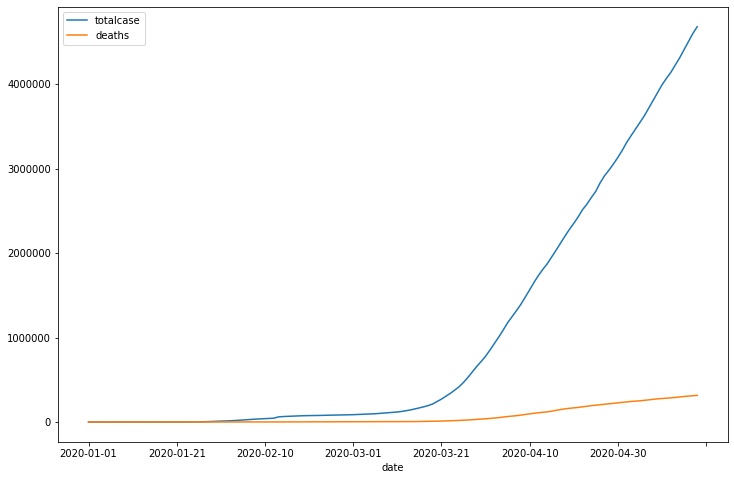

In [5]:
#bar chart for total confrimed and fatalities cases
axis = df[['date','totalcase','deaths']].set_index('date').plot(figsize=(12, 8))
plt.show()

In [6]:
def train_test_data_split(df,period=5):
  """
  This functions prepare train test data split

  Parameters
    df (dataframe) : The dataframe to be processed
    period (int) : Test dataset size(default is 5 days)
  Returns:  
    train_data (dataframe) - train set to train the model
    test_data (dataframe) -  test set to train the model
  """
  #Excluding last 5 for the training set
  train_data = df[:-period]
  #Including last 5 for the test set
  test_data =  df[-period:]
  return train_data,test_data

In [12]:
x = train_test_data_split(df)
print(x)

(     totalcase  newcase  deaths  newdeath        date
0           27        0       0         0  2020-01-01
1           27        0       0         0  2020-01-02
2           44       17       0         0  2020-01-03
3           44        0       0         0  2020-01-04
4           59       15       0         0  2020-01-05
..         ...      ...     ...       ...         ...
129    3899738    90139  274511      5268  2020-05-09
130    3989894    90156  278951      4440  2020-05-10
131    4066883    76989  282361      3410  2020-05-11
132    4137915    71032  285930      3569  2020-05-12
133    4223701    85786  291696      5766  2020-05-13

[134 rows x 5 columns],      totalcase  newcase  deaths  newdeath        date
134    4309652    85951  296883      5187  2020-05-14
135    4406317    96665  302253      5370  2020-05-15
136    4504351    98034  307398      5145  2020-05-16
137    4598546    94195  311675      4277  2020-05-17
138    4679511    80965  315005      3330  2020-05-18)


In [8]:
def modeling(train_data):
  """
  This functions helps in build and deploy the model

  Parameters
    train_data (dataframe) : train set to train the model
  Returns:  
    pm (prophet object) -  prophet object to run the predictions
  """
  #Prophet algorith helps to predict the time series data
  pm = Prophet(changepoint_prior_scale=0.95,interval_width=1)
  #training the model
  pm.fit(train_data)
  return pm

In [17]:
modelling(new_df)

NameError: name 'modelling' is not defined

In [27]:
pm = modeling(new_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
def predictions(pm,periods=5):
  """
  This functions helps in run the predictions

  Parameters
    pm (prophet object) -  prophet object to run the predictions
    periods(int) - Number of days for predictions
  Returns:  
    pm_forecast (dataframe) -  dataframe with predictions
  """
  #considering 5 future days
  future = pm.make_future_dataframe(periods)
  #predicting provided dayes
  pm_forecast = pm.predict(future)
  return pm_forecast

In [29]:
predictions(pm)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,3.382379e+03,-3.068927e+04,2.502830e+04,3.382379e+03,3.382379e+03,-3398.248816,-3398.248816,-3398.248816,-3398.248816,-3398.248816,-3398.248816,0.0,0.0,0.0,-1.586991e+01
1,2020-01-02,2.152747e+03,-2.564342e+04,2.711080e+04,2.152747e+03,2.152747e+03,-3290.809998,-3290.809998,-3290.809998,-3290.809998,-3290.809998,-3290.809998,0.0,0.0,0.0,-1.138063e+03
2,2020-01-03,9.231149e+02,-2.398914e+04,2.396843e+04,9.231149e+02,9.231149e+02,-630.645778,-630.645778,-630.645778,-630.645778,-630.645778,-630.645778,0.0,0.0,0.0,2.924691e+02
3,2020-01-04,-3.065171e+02,-2.535961e+04,2.560849e+04,-3.065171e+02,-3.065171e+02,1891.317669,1891.317669,1891.317669,1891.317669,1891.317669,1891.317669,0.0,0.0,0.0,1.584801e+03
4,2020-01-05,-1.536149e+03,-2.125254e+04,3.008092e+04,-1.536149e+03,-1.536149e+03,5020.671764,5020.671764,5020.671764,5020.671764,5020.671764,5020.671764,0.0,0.0,0.0,3.484523e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2020-05-19,4.727880e+06,4.699301e+06,4.749059e+06,4.711395e+06,4.743957e+06,-2684.922961,-2684.922961,-2684.922961,-2684.922961,-2684.922961,-2684.922961,0.0,0.0,0.0,4.725195e+06
140,2020-05-20,4.810688e+06,4.767500e+06,4.857608e+06,4.774950e+06,4.844769e+06,-3398.248816,-3398.248816,-3398.248816,-3398.248816,-3398.248816,-3398.248816,0.0,0.0,0.0,4.807290e+06
141,2020-05-21,4.893496e+06,4.832585e+06,4.944848e+06,4.836863e+06,4.945582e+06,-3290.809998,-3290.809998,-3290.809998,-3290.809998,-3290.809998,-3290.809998,0.0,0.0,0.0,4.890205e+06
142,2020-05-22,4.976303e+06,4.891999e+06,5.062842e+06,4.890084e+06,5.057245e+06,-630.645778,-630.645778,-630.645778,-630.645778,-630.645778,-630.645778,0.0,0.0,0.0,4.975673e+06
